# Keras Callback

Dans ce notebook nous allons ajouter un callback de sauvegarde des logs




In [21]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

print(tf.__version__)

2.15.0


In [22]:
# load le dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

LABEL: [2] 


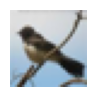

In [23]:
idx = 808

print(f'LABEL: {train_labels[idx]} ')
fig, ax = plt.subplots(1,1, figsize = (1,1))
plt.imshow(train_images[idx])
plt.axis('off')
plt.show()

In [56]:
## construire le modele et le compiler

def create_model(n_nodes = 256, lr = 0.01):
    model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(n_nodes, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])

    # Compile the model
    model.compile(optimizer=tf.optimizers.Adam(  learning_rate=lr),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

    return model


In [57]:
model = create_model()

In [59]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 3072)              0         
                                                                 
 dense_12 (Dense)            (None, 256)               786688    
                                                                 
 dense_13 (Dense)            (None, 10)                2570      
                                                                 
Total params: 789258 (3.01 MB)
Trainable params: 789258 (3.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


callback early_stopping

https://keras.io/api/callbacks/early_stopping/

In [60]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [61]:
# entrainer le modele

history = model.fit(train_images, train_labels, epochs=5, callbacks=[early_stopping])

Epoch 1/5
1563/1563 [==============================] - 20s 12ms/step - loss: 130.0992 - accuracy: 0.1009
Epoch 2/5
1563/1563 [==============================] - 18s 11ms/step - loss: 2.3040 - accuracy: 0.0991
Epoch 3/5
1563/1563 [==============================] - 17s 11ms/step - loss: 2.3040 - accuracy: 0.0993
Epoch 4/5
1563/1563 [==============================] - 17s 11ms/step - loss: 2.3040 - accuracy: 0.0982
Epoch 5/5
1563/1563 [==============================] - 18s 11ms/step - loss: 2.3038 - accuracy: 0.0987


In [62]:
# acceder aux courbes accuracy et loss
history.history['accuracy']

[0.10093999654054642,
 0.09907999634742737,
 0.09933999925851822,
 0.0982000008225441,
 0.09865999966859818]

Autre callback

https://keras.io/api/callbacks/reduce_lr_on_plateau/

In [63]:
# reset le modele
model = create_model()
# callbacks
# early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=4)
# rajouter le call back ReduceLROnPlateau
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.2, patience=2, min_lr=0.0001)


history = model.fit(train_images, train_labels, epochs=10, callbacks=[early_stopping, reduce_lr])

Epoch 1/10
1563/1563 [==============================] - 18s 11ms/step - loss: 99.2213 - accuracy: 0.0971 - lr: 0.0100
Epoch 2/10
1563/1563 [==============================] - 18s 11ms/step - loss: 2.3040 - accuracy: 0.0982 - lr: 0.0100
Epoch 3/10
1563/1563 [==============================] - 18s 11ms/step - loss: 2.3039 - accuracy: 0.0999 - lr: 0.0100
Epoch 4/10
1563/1563 [==============================] - 18s 11ms/step - loss: 2.3040 - accuracy: 0.0998 - lr: 0.0100
Epoch 5/10
1563/1563 [==============================] - 17s 11ms/step - loss: 2.3040 - accuracy: 0.0989 - lr: 0.0100
Epoch 6/10
1563/1563 [==============================] - 18s 11ms/step - loss: 2.3029 - accuracy: 0.1019 - lr: 0.0020
Epoch 7/10
1563/1563 [==============================] - 18s 11ms/step - loss: 2.3029 - accuracy: 0.1005 - lr: 0.0020
Epoch 8/10
1563/1563 [==============================] - 17s 11ms/step - loss: 2.3030 - accuracy: 0.0967 - lr: 0.0020
Epoch 9/10
1563/1563 [==============================] - 18s 12m